<a href="https://colab.research.google.com/github/yenlung/Py-Math-Book/blob/main/%E5%86%92%E9%9A%AA10_%E7%AC%A6%E8%99%9F%E5%9E%8B%E9%81%8B%E7%AE%97%E5%92%8C%CF%80%E5%AF%86%E7%A2%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### 1. 符號型運算

開始寫程式, 不久之後我們就會發現, 電腦不太會算我們平常的數學。

In [2]:
1/2 + 1/3

0.8333333333333333

交給 `sympy` 算是這樣。

In [3]:
a = sp.Rational(1, 2) # 1/2
b = sp.Rational(1, 3) # 1/3

In [4]:
a + b

5/6

### 2. 運用「sympy 化」的技巧

In [5]:
sp.sympify(1)/2 + sp.sympify(1)/3

5/6

單獨讀入 `sympify` 的簡化版指令 `S`。

In [6]:
from sympy import S

In [7]:
S(1)/2 + S(1)/3

5/6

### 3. `sympy` 真的像數學課的數學

In [8]:
sp.cos(sp.pi/4)

sqrt(2)/2

In [9]:
π = sp.pi

In [10]:
sp.cos(π/4)

sqrt(2)/2

### 4. 你知道世界上所有的事都在 π 裡面嗎?

In [11]:
π.n(20)

3.1415926535897932385

In [12]:
egg = str(π.n(100000))

In [13]:
'1215' in egg

True

In [14]:
print('M', ord('M'))
print('a', ord('a'))
print('c', ord('c'))

M 77
a 97
c 99


In [15]:
'779799' in egg

False

耶, 跟我們廣告的不一樣? 不緊張, 要更多位的 π 試試看!

In [16]:
egg = str(π.n(300000))

In [17]:
'779799' in egg

True

各種運算其實都可以用 `n` 的技巧。

In [18]:
k = sp.sqrt(2)

In [19]:
k.n(100)

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573

### 5. 真的可以符號型運算!

我們可以用 `sympy` 表示 $\sin(x)$ 等等函數, 而 $x$ 真的是個數學上的變數!

#### 方法 1

In [20]:
sp.var('x')

x

In [21]:
expr = x**2

In [22]:
expr

x**2

In [23]:
expr.subs(x,2)

4

#### 方法 2

In [24]:
x = sp.Symbol('x')

#### 方法 3

In [25]:
x = sp.symbols('x')

和上次的有何不同呢? 原來是可以同時令兩個變數!

In [26]:
x, y = sp.symbols('x,y')

In [27]:
x

x

In [28]:
y

y

In [29]:
a, b = sp.symbols(r'\alpha,\beta')

In [30]:
a

\alpha

In [31]:
sp.expand((a+b)**3)

\alpha**3 + 3*\alpha**2*\beta + 3*\alpha*\beta**2 + \beta**3

#### 方法 4

In [32]:
from sympy.abc import x, y, z

In [33]:
z**2

z**2

In [34]:
sp.expand((x+y)**2)

x**2 + 2*x*y + y**2

In [35]:
expr = (x+y+z)**2

In [36]:
expr.subs({x:2,y:3,z:1})

36

甚至可以做很酷的微積分!

In [37]:
sp.diff(sp.cos(x))

-sin(x)

In [38]:
sp.integrate(1/x)

log(x)

### 6. 當初 π 是怎麼算的呢?

如果你想到這件事...

$$\tan(\pi/4) = 1$$

那就是說

$$4 \arctan(1) = \pi$$

In [39]:
np.arctan(1)*4

3.141592653589793

In [40]:
sp.atan(1)*4

pi

但是誰知 $\arctan$ 怎麼算呢? 是不是有種想法, 如果是多項式就好了...

In [41]:
expr = sp.series(sp.atan(x),x,n=10)

In [42]:
expr

x - x**3/3 + x**5/5 - x**7/7 + x**9/9 + O(x**10)

In [43]:
expr = expr.removeO()

In [44]:
(expr.subs(x,1)*4).evalf()

3.33968253968254

In [45]:
expr = sp.series(sp.atan(x),x,n=200)

In [46]:
expr = expr.removeO()

In [47]:
(expr.subs(x,1)*4).evalf()

3.13159290355855

方法可行, 但收斂很慢!

### 7. 蒙地卡羅法計算 π

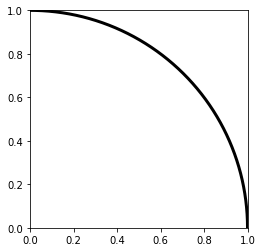

In [48]:
π = np.pi
θ = np.linspace(0, π/2, 200)
x = np.cos(θ)
y = np.sin(θ)

ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(x,y,c='k',lw=3)

In [49]:
n = 200
x = np.random.rand(n)
y = np.random.rand(n)

In [50]:
egg = x**2 + y**2 <= 1

In [51]:
k = len(x[egg])

In [52]:
k/n * 4

2.98

In [53]:
ham = np.invert(egg)

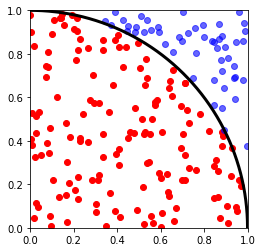

In [54]:
π = np.pi
θ = np.linspace(0, π/2, 200)
xc = np.cos(θ)
yc = np.sin(θ)

ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(xc,yc,c='k',lw=3)

plt.scatter(x[egg], y[egg], c='r')
plt.scatter(x[ham], y[ham], c='b', alpha=0.6)